# Реляционные базы данных

Теперь рассмотрим более подробно реляционные БД.

***Реляционная база данных*** — это набор данных с предопределенными связями между ними. Эти данные представлены в виде таблиц, состоящих из столбцов и строк. В каждом столбце таблицы хранится определенный тип данных, в каждой ячейке — значение. Каждая строка в такой таблице предоставляет набор значений, относящихся к одному объекту.

Реляционная модель предполагает логическую структуру данных: таблицы, представления и индексы. Логическая структура отличается от физической структуры хранения.

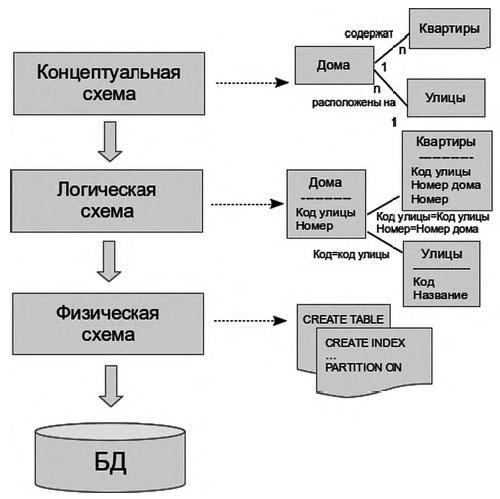

Соответственно, для ясности, под логической структурой понимаются таблицы, под физической — файлы. Такое разделение дает возможность администраторам управлять физической системой хранения, не меняя данных, содержащихся в логической структуре. Например, можно изменить файловое имя базы данных, что не влияет на хранящиеся в ней таблицы.

В первых базах данных данные каждого приложения хранились в отдельной уникальной структуре. Если разработчик хотел создать приложение для использования таких данных, он должен был хорошо знать конкретную структуру, чтобы найти необходимые данные. Такой метод организации был неэффективен, сложен в обслуживании, и затруднял оптимизацию эффективности приложений. Реляционная модель была разработана, чтобы устранить потребность в использовании разнообразных структур данных.

Она обеспечила стандартный способ представления данных и отправки запросов, которые могли быть использованы в любых приложениях. Разработчики уяснили, что таблицы являются ключевым преимуществом реляционных баз данных, так как обеспечивают интуитивно понятный, эффективный и гибкий способ хранения структурированной информации и получения к ней доступа.

Также мы можем отслеживать добавляемые данные для обеспечения структурной целостности. Например, атрибут UNIQUE говорит о том, что значения в столбце не могут повторяться.

А теперь, когда мы знаем теоретическую часть, самое время посмотреть, как данный механизм работает на практике. Рассмотрим пример создания такой БД в MySQL.

Заходим в MySQL через команду mysql:

In [ ]:
sudo mysql
Welcome to the MySQL monitor.  Commands end with ; or\g.
Your MySQL connection id is 4
Server version: 5.7.31-0ubuntu0.18.04.1 (Ubuntu)

Copyright (c) 2000, 2020, Oracle and/or its affiliates. All rights reserved.

Oracle is a registered trademark of Oracle Corporation and/or its
affiliates. Other names may be trademarks of their respective
owners.

Type 'help;' or '\h' for help. Type '\c' to clear the current input statement.

mysql> 

Дальше так же одной строчкой создаем тестовую БД:

In [ ]:
mysql> CREATE DATABASE testdb;
Query OK, 1 row affected (0.00 sec)

Устанавливаем её активной БД для дальнейшей работы с ней:

In [ ]:
mysql> use testdb;
Database changed

На данный момент у нас есть пустая БД без таблиц, но сейчас мы это исправим с помощью команды CREATE TABLE.

In [ ]:
CREATE TABLE testtable (
    id INT AUTO_INCREMENT PRIMARY KEY,
    title VARCHAR(255) NOT NULL,
    description TEXT
);

Получаем результат:

In [ ]:
CREATE TABLE testtable (id INT AUTO_INCREMENT PRIMARY KEY,title VARCHAR(255) NOT NULL,description TEXT);
Query OK, 0 rows affected (0.03 sec)

Что мы получили?

* id — это поле, в котором мы храним уникальный идентификатор для каждой созданной строки в таблице;
* INT говорит о том, что этот идентификатор — число;
* AUTO_INCREMENT — то, что с каждым новым добавлением новой строки он будет возрастать на 1;
* PRIMARY KEY  показывает, что это поле — первичный ключ, но об этом в следующем юните.
Рассмотрим 3 и 4 строки запроса выше:
* title собственно название второго столбца;
* VARCHAR(255)значит, что данное поле состоит из символов не более 255 штук;
* NOT NULL — поле должно быть обязательно заполнено при вставке в таблицу, иначе запрос не пройдёт;
* description — название третьего столбца
* столбец TEXT в большинстве случаев может рассматриваться как столбец VARCHAR неограниченного размера.

Что ж, теперь попробуем добавить в таблицу данные с помощью команды insert:

In [ ]:
mysql> insert testtable(title,description) VALUES ('test1' ,'test2');
Query OK, 1 row affected (0.01 sec)
mysql>  insert testtable(title,description) VALUES ('test1111' ,'test22222');
Query OK, 1 row affected (0.01 sec)

Ну и посмотрим на наши данные:

In [ ]:
mysql> select * from testtable;
+----+----------+-------------+
| id | title    | description |
+----+----------+-------------+
|  1 | test1    | test2       |
|  2 | test1111 | test22222   |
+----+----------+-------------+
2 rows in set (0.00 sec)

Ограничение UNIQUE гарантирует, что все значения в столбце различаются.

Уникальные и первичные ограничения предоставляют гарантию уникальности для столбца или набора столбцов.

Ограничение первичного ключа автоматически имеет уникальное ограничение. Однако, можно иметь много уникальных ограничений для каждой таблицы, но только одно ограничение первичного ключа для каждой таблицы.

In [ ]:
CREATE TABLE Persons (
    ID int NOT NULL,
    LastName varchar(255) NOT NULL,
    FirstName varchar(255),
    Age int,
    UNIQUE (ID)
);
Query OK, 0 rows affected (0.04 sec)

акже мы можем менять данные в таблице с помощью оператора UPDATE.

Оператор UPDATE обновляет столбцы в соответствии с их новыми значениями в строках существующей таблицы. В выражении SET указывается, какие именно столбцы следует модифицировать и какие величины должны быть в них установлены. В выражении WHERE, если оно присутствует, задаётся, какие строки подлежат обновлению.

In [ ]:
mysql> UPDATE testtable SET title="REALTEST" where id =2;
Query OK, 1 row affected (0.01 sec)
Rows matched: 1  Changed: 1  Warnings: 0

mysql> select * from testtable;
+----+----------+-------------+
| id | title    | description |
+----+----------+-------------+
|  1 | test1    | test2       |
|  2 | REALTEST | test22222   |
+----+----------+-------------+
2 rows in set (0.00 sec)